<a href="https://colab.research.google.com/github/PRAN20/Skin-Color-Transfer-3D/blob/main/Skin_ColourTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install image4layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for image4layer: filename=Image4Layer-0.43.4-py3-none-any.whl size=4440 sha256=77e4d2ddcbcc6f8aae6187aa89fd6f93609a4ddde3b489986250d863048adae2
  Stored in directory: /root/.cache/pip/wheels/95/dc/97/93ae643b7b060bd4380c48b0311f1a3a72a820426848886a42
Successfully built image4layer


In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [95]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
   # if (show_chart):
       # plt.figure(figsize = (8, 6))
        #plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    #plt.savefig("Result.png")
    return rgb_colors

value = get_colors(get_image('/content/face.jpg'), 1, True)
x,y,z = value[0]
x = int(x)
y = int(y)
z = int(z)

print(x,y,z)

191 149 146


In [96]:
from PIL import Image

img = Image.open("/content/body_tex.jpg")
img = img.convert("RGB")

datas = img.getdata()

new_image_data = []
for item in datas:
    # change all white (also shades of whites) pixels to yellow
    #[array([34.30572083, 36.28030417, 58.934625  ])]
    if item[0] in list(range(34, 36)):
        #new_image_data.append((120, 0, 0))
        new_image_data.append(item)
    else:
        new_image_data.append((x, y, z))
        #new_image_data.append(item)
        
# update image data
img.putdata(new_image_data)

# save new image
img.save("Colour-Image.jpg")

# show image in preview
img.show()

In [97]:
import matplotlib.pyplot as plt
def concatenate(img1, img2):
  plt.figure(figsize = (10,10))
  plt.subplot(1,2,1)
  plt.axis("off")
  plt.imshow(img1)
  plt.subplot(1,2,2)
  plt.imshow(img2)
  plt.axis("off")
  plt.show()

In [100]:
from PIL import Image
from image4layer import Image4Layer

source = Image.open("/content/body_tex.jpg")
backdrop = Image.open("/content/Colour-Image.jpg")
x, y = source.size
backdrop = backdrop.resize((x,y))

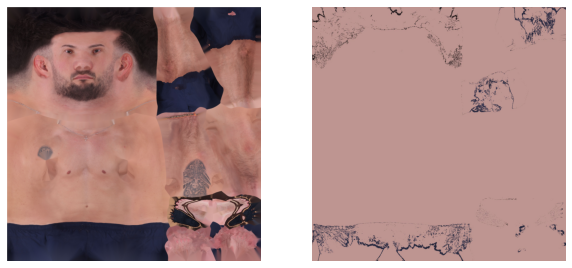

In [101]:
concatenate(source, backdrop)

In [102]:
new_image = Image4Layer.hard_light(backdrop, source)
#new_image = Image4Layer.screen(backdrop, source)
#new_image = Image4Layer.overlay(backdrop, source)

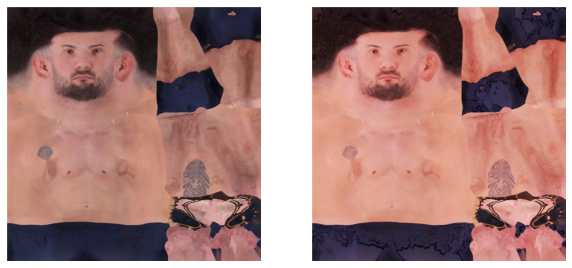

In [103]:
concatenate(source, new_image)

In [88]:
new_image.save("Result-Check7.png")